<a href="https://colab.research.google.com/github/Purity-asiko/Pree-Projects/blob/main/Stock_price_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project : Stock Price Visualization and Simple Prediction (Time Series)

Objective: Visualize historical stock prices and predict future prices using a simple model.

 Time series analysis is widely applicable, and this project demonstrates data fetching and trend analysis.


Dataset: Yahoo Finance stock data (via yfinance).

In [ ]:
!pip install yfinance
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
stock = yf.download('AAPL', start='2020-01-01', end='2025-01-01')
data = stock[['Close']].reset_index()

/tmp/ipython-input-2-851073963.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download('AAPL', start='2020-01-01', end='2025-01-01')
[*********************100%***********************]  1 of 1 completed


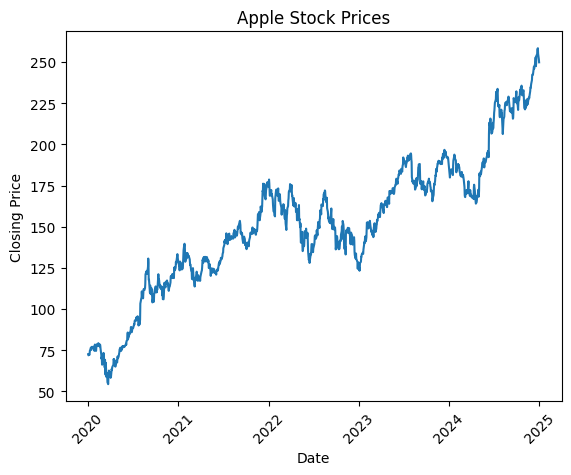

In [ ]:
plt.plot(data['Date'], data['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Apple Stock Prices')
plt.xticks(rotation=45)
plt.show()

In [ ]:
data['Time'] = range(len(data))
X = data[['Time']]
y = data['Close']

In [ ]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
future_days = 30
future_X = pd.DataFrame({'Time': range(len(data), len(data) + future_days)})
predictions = model.predict(future_X)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


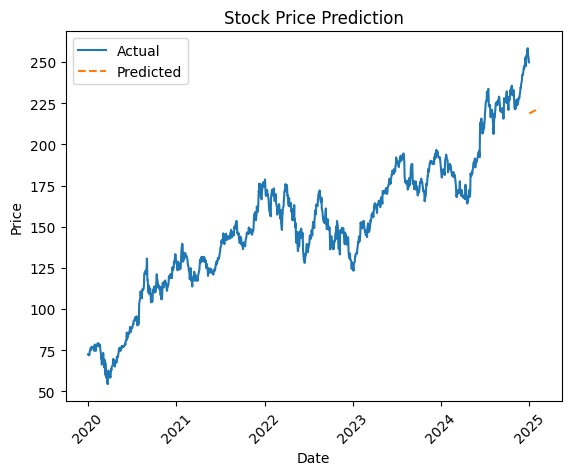

In [ ]:
plt.plot(data['Date'], data['Close'], label='Actual')
future_dates = pd.date_range(start=data['Date'].iloc[-1], periods=future_days + 1, freq='B')[1:]
plt.plot(future_dates, predictions, label='Predicted', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.xticks(rotation=45)
plt.show()